In [2]:
import numpy as np
import xarray as xr
import pandas as pd 
import seaborn as sns
from scipy import optimize
from scipy import interpolate
import matplotlib.pyplot as plt 

In [11]:
with xr.open_dataset('./result/fish/nc/fish_1000a_dt_1_dx_500_MB_7.0_OFF.nc') as src: 
    # correct for minimum ice thickness
    src["depth"] = xr.where(src.depth <= 10, 0, src.depth)
    # apply sigma coordinate transform for vertical coordinate
    src["Z"]     = src.zbed + src.Z * src.height 
    # Calculate the magnitude of the velocity vectors
    src['vel_m'] = np.sqrt(src['velocity 1']**2 + src['velocity 2']**2)    
    
Vol = src.height.isel(coord_2=-1).integrate("coord_1") /\
      src.height.isel(coord_2=-1).isel(t=0).integrate("coord_1")

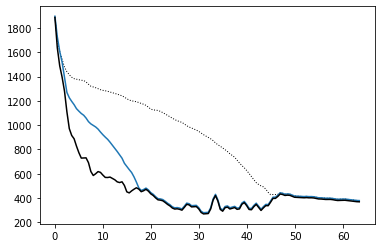

In [4]:
fig, ax = plt.subplots()
ax.plot(src.coord_1[::-1]/1000.,
        src.isel(t=0,coord_2=-1).Z,
        color='k', ls=':', lw=1.0, label=r'$z_{\rm s}(t=0)$')


ax.plot(src.coord_1[::-1]/1000.,
        src.isel(t=300,coord_2=-1).Z,
        color='tab:blue',
        label="Cuffey and Paterson, (2010)")

ax.plot(src.coord_1[::-1]/1000.,
        src.isel(t=0,coord_2=-1).zbed,
        color='k', label=r'$z_{\rm b}$ - Flowline B')

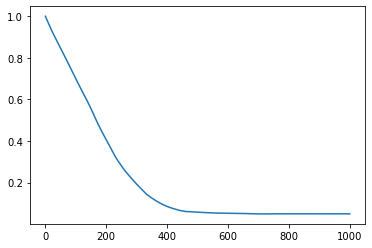

In [5]:
plt.plot(Vol.t, Vol)

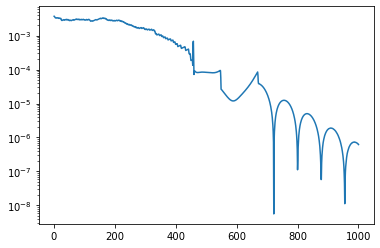

In [6]:
plt.plot(Vol.t, np.abs(Vol.differentiate('t')))
plt.yscale('log')

In [7]:
src.vel_m.isel(t=slice(0,700)).max()*(1/200)

<xarray.DataArray 'vel_m' ()>
array(225.15277344)

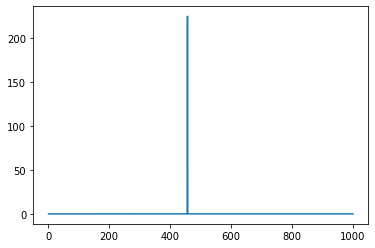

In [8]:
plt.plot(src.t, src.vel_m.max(dim=('coord_1', 'coord_2'))*(1/200))
#plt.yscale('log')